# Gridrec

Here is an example on how to use [TomoPy](http://tomopy.readthedocs.io/en/latest/) with the gridrec algorithm. 

In this example, [DXchange](http://dxchange.readthedocs.io) is used to import data from the Advanced Photon Source. Data from all major [synchrotron](http://dxchange.readthedocs.io/en/latest/source/demo.html) facilities may also be imported using DXchange.

Matplotlib is used to plot the results in this notebook. [Paraview](http://www.paraview.org/) or other tools are available for more sophisticated 3D rendering.

In [1]:
import dxchange
import matplotlib.pyplot as plt
import numpy
import tomopy

Set the path to the micro-CT data to reconstruct.

In [2]:
fname = '../../source/tomopy/data/tooth.h5'

Select the sinogram range to reconstruct.

In [3]:
start = 0
end = 2

This data set file format follows the [APS](http://www.aps.anl.gov) beamline [2-BM and 32-ID](https://www1.aps.anl.gov/Imaging) definition. Other file format readers are available at [DXchange](http://dxchange.readthedocs.io/en/latest/source/api/dxchange.exchange.html).

In [4]:
proj, flat, dark, theta = dxchange.read_aps_32id(fname, sino=(start, end))

Plot the sinogram:

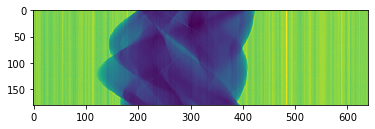

In [5]:
plt.imshow(proj[:, 0, :])
plt.show()

If the angular information is not avaialable from the raw data you need to set the data collection angles. In this case theta is set as equally spaced between 0-180 degrees.

In [6]:
if theta is None:
    theta = tomopy.angles(proj.shape[0])

Perform the flat-field correction of raw data: $$ \frac{proj - dark} {flat - dark} $$

In [7]:
proj = tomopy.normalize(proj, flat, dark)

Tomopy provides various methods to [find rotation center](http://tomopy.readthedocs.io/en/latest/api/tomopy.recon.rotation.html).

In [8]:
rot_center = tomopy.find_center(proj, theta, init=290, ind=0, tol=0.5)

Reconstructing 48 slice groups with 1 master threads...
Reconstructing 48 slice groups with 1 master threads...
Reconstructing 48 slice groups with 1 master threads...
Reconstructing 48 slice groups with 1 master threads...
Reconstructing 48 slice groups with 1 master threads...
Reconstructing 48 slice groups with 1 master threads...
Reconstructing 48 slice groups with 1 master threads...
Reconstructing 48 slice groups with 1 master threads...
Reconstructing 48 slice groups with 1 master threads...
Reconstructing 48 slice groups with 1 master threads...
Reconstructing 48 slice groups with 1 master threads...
Reconstructing 48 slice groups with 1 master threads...
Reconstructing 48 slice groups with 1 master threads...


Calculate $$ -log(proj) $$

In [9]:
proj = tomopy.minus_log(proj)

Reconstruction using Gridrec algorithm.Tomopy provides various [reconstruction](http://tomopy.readthedocs.io/en/latest/api/tomopy.recon.algorithm.html) methods including the one part of the [ASTRA toolbox](https://sourceforge.net/p/astra-toolbox/wiki/Home/).

In [10]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm='gridrec', sinogram_order=False)

Reconstructing 48 slice groups with 2 master threads...


Mask each reconstructed slice with a circle.

In [11]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)

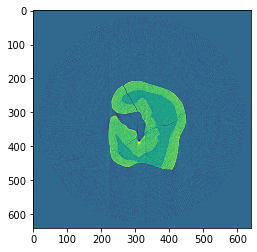

In [12]:
plt.imshow(recon[0, :,:])
plt.show()